<a href="https://colab.research.google.com/github/RAVIAPTISWETHA/-Deep-Learning-Applications-in-Heart-Diseases-Using-ECG-Images/blob/main/Version1_DLA_Heart_Diseases_using_ECG_Images_OD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import VGG16
!pip install keras-tuner
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


/tmp/ipython-input-1-514173189.py:14: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Loading

In [3]:
dir_mendeley = '/content/drive/My Drive/Colab Notebooks/ECGM'

In [4]:
def load_dataset(dir ):
    folders = os.listdir(dir)
    file_path = []
    labels = []
    sub_folders =[]
    for folder in folders:
        sub_folder = os.path.join(dir, folder)
        sub_list = os.listdir(sub_folder)
        for file in sub_list:
            f_path = os.path.join(sub_folder, file)
            file_path.append(f_path)
            labels.append(folder)
    return file_path, labels
train_file_path, train_labels = load_dataset(dir_mendeley)
print(len(train_file_path))
mendeley_path, mendeley_labels = load_dataset(dir_mendeley )
df = pd.DataFrame({'file_path': mendeley_path, "labels": mendeley_labels})
df.labels.value_counts()

707


,count
labels,
Normal Person,295
Abnormal heartbeat,241
History of MI,171


## Class Distribution

/tmp/ipython-input-5-3745455416.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='labels', order=df['labels'].value_counts().index, palette=['grey', 'lightblue', 'yellow'])


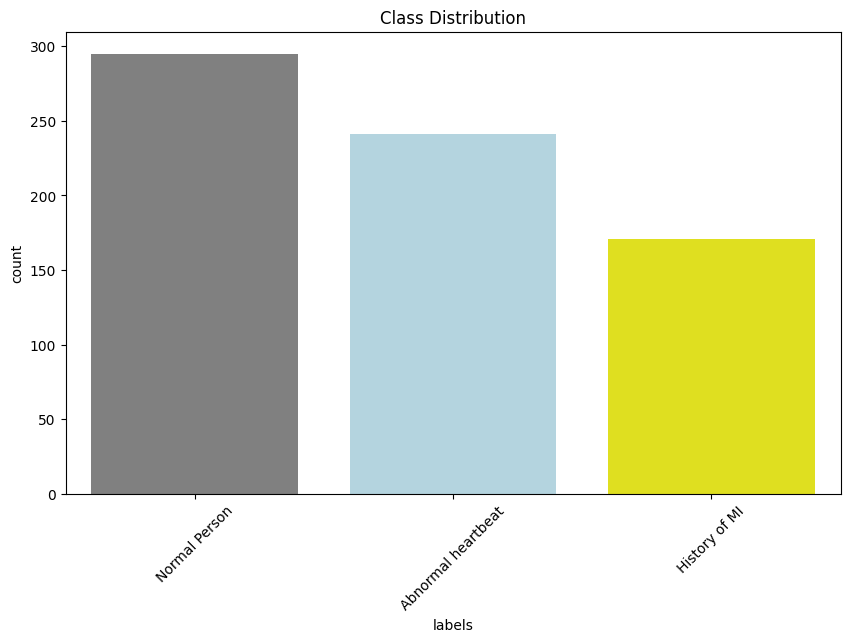

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='labels', order=df['labels'].value_counts().index, palette=['grey', 'lightblue', 'yellow'])
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()